In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import zipfile
import shutil
import pandas as pd
import matplotlib.pyplot as plt
# Step 1: Extract images from ZIP file
zip_path = '/content/drive/MyDrive/Images.zip'
temp_dir = 'temp_images'
os.makedirs(temp_dir, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(temp_dir)


In [3]:
# Step 2: Read CSV files
train_csv_path = '/content/drive/MyDrive/Train.csv'
test_csv_path = '/content/drive/MyDrive/Test.csv'

train_df = pd.read_csv(train_csv_path)
test_df = pd.read_csv(test_csv_path)

In [4]:
# Lets print the first five rows of the training set
train_df.head()

,Image_id,Label
0,id_02amazy34fgh2.jpg,1
1,id_02mh3w48pmyc9.jpg,0
2,id_02rpb463h9d3w.jpg,0
3,id_02wc3jeeao8ol.jpg,1
4,id_03t2hapb8wz8p.jpg,1


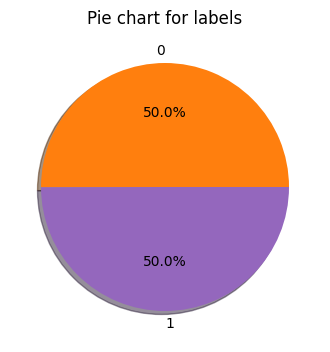

In [6]:

# Create a pie chart to show the percentage for the target column
plt.figure(figsize=(4,5))
values = train_df['Label'].value_counts() /train_df.shape[0]
plt.pie(values,labels=values.keys(),autopct="%1.1f%%",shadow=True,colors=['C1','C4'])
plt.title("Pie chart for labels")
plt.show()

In [7]:
test_df.head()

,Image_id
0,id_00exusbkgzw1b.jpg
1,id_03dqinf6w0znv.jpg
2,id_046yl0cxn3ybz.jpg
3,id_04athdtx2abyg.jpg
4,id_062aauf9e9jk0.jpg


In [8]:
test_df.columns

Index(['Image_id'], dtype='object')

In [9]:
# Assuming the CSVs have columns 'Image_id' and 'Label'
assert 'Image_id' in train_df.columns and 'Label' in train_df.columns
assert 'Image_id' in test_df.columns and 'Label' not in test_df.columns

# Step 3: Match images to labels
train_image_ids = set(train_df['Image_id'])
test_image_ids = set(test_df['Image_id'])

images_in_temp_dir = {f[:-4] for f in os.listdir(temp_dir)}  # Remove '.jpg' extension
train_image_ids = {f[:-4] for f in train_image_ids}  # Remove '.jpg' extension
test_image_ids = {f[:-4] for f in test_image_ids}  # Remove '.jpg' extension

In [10]:
# Step 4: Create directories for training and testing sets
train_dir = 'train_set'
test_dir = 'test_set'
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)


In [11]:
from re import I
# Step 5: Move images according to labels
for image_file in images_in_temp_dir:
    Label = None

    # Check if image is in train set
    if image_file in train_image_ids:
      Label = 'train_set'
    elif  image_file in test_image_ids:
      Label = 'test_set'

    if Label:
      shutil.move(os.path.join(temp_dir, image_file + '.jpg'), os.path.join(Label, image_file + '.jpg'))

print("Image splitting completed.")

Image splitting completed.


In [12]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [13]:
# Load CSV files
train_labels = pd.read_csv(train_csv_path)
test_labels = pd.read_csv(test_csv_path)
# Define paths
train_path = '/content/train_set'
test_path = '/content/test_set'

In [14]:
train_df.head()

,Image_id,Label
0,id_02amazy34fgh2.jpg,1
1,id_02mh3w48pmyc9.jpg,0
2,id_02rpb463h9d3w.jpg,0
3,id_02wc3jeeao8ol.jpg,1
4,id_03t2hapb8wz8p.jpg,1


In [15]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1619 entries, 0 to 1618
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Image_id  1619 non-null   object
 1   Label     1619 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 25.4+ KB


In [54]:
import matplotlib.image as mgimg
import matplotlib.pyplot as plt
from PIL import Image

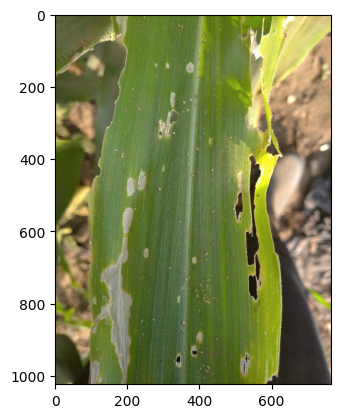

In [57]:
# Code to display the image in the training set
img = mgimg.imread("/content/train_set/id_02amazy34fgh2.jpg")
plt.imshow(img)
plt.show()

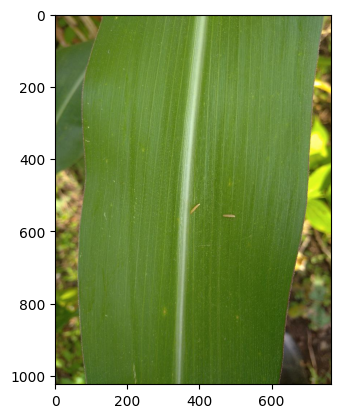

In [18]:
# Code to display the image  in the testing set
img = mgimg.imread("/content/test_set/id_00exusbkgzw1b.jpg")
plt.imshow(img)
plt.show()

In [19]:
# Data preprocessing and augmentation
data_gen = ImageDataGenerator(rescale=1./255., horizontal_flip=True, validation_split=0.2)

# Create data generators
train_generator = data_gen.flow_from_dataframe(
    train_labels,
    directory=train_path,
    x_col='Image_id',
    y_col='Label',
    subset="training",
    color_mode="rgb",
    target_size=(150, 150),
    class_mode='raw',
    batch_size=32,
    shuffle=True,
    seed=42,
)

validation_generator = data_gen.flow_from_dataframe(
    train_labels,
    directory=train_path,
    x_col='Image_id',
    y_col='Label',
    subset="validation",
    color_mode="rgb",
    target_size=(150, 150),
    class_mode='raw',
    batch_size=32,
    shuffle=True,
    seed=42,
)


Found 1296 validated image filenames.
Found 323 validated image filenames.


In [20]:
# Code to check the shape on the train genenerator
train_generator.image_shape

(150, 150, 3)

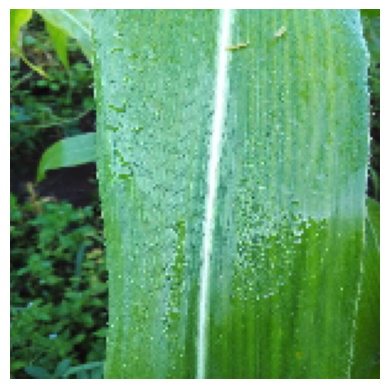

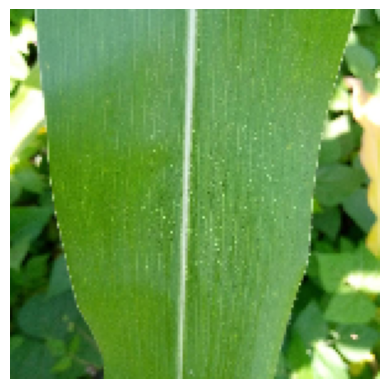

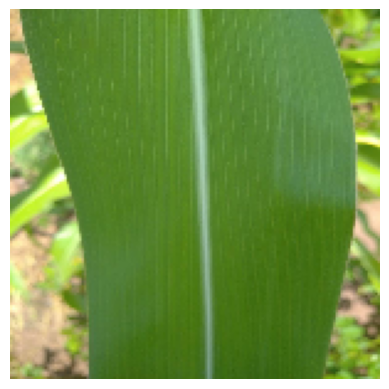

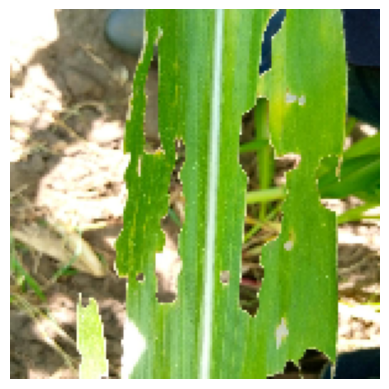

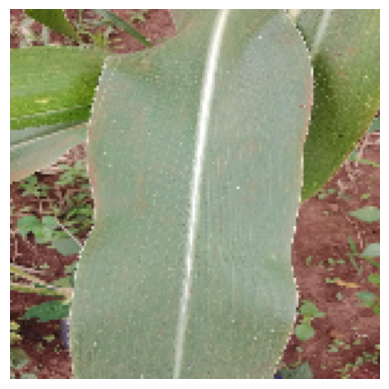

In [21]:
for _ in range(5):  # Adjust the range based on how many images you want to display
    img, label = next(validation_generator)
    plt.imshow(img[0])  # Display the first image in the batch
    plt.axis('off')  # Hide axes
    plt.show()  # Show the image

In [22]:
validation_generator.image_shape

(150, 150, 3)

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [24]:
# Define the Model Architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [25]:
auc_metric = tf.keras.metrics.AUC(num_thresholds=200, curve='ROC')
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=[auc_metric])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 73984)             0

In [26]:
# Set batch size, number of workers, and max queue size
batch_size = 32
num_workers = 4
max_queue_size = 10

In [27]:
# Enable multiprocessing
use_multiprocessing = True

In [28]:
# Train the model using fit_generator
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=20,
    use_multiprocessing=use_multiprocessing,
    workers=num_workers,
    max_queue_size=max_queue_size
)

Epoch 1/20


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


40/40 [==============================] - ETA: 0s - loss: 0.6903 - auc: 0.5582

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


40/40 [==============================] - 28s 520ms/step - loss: 0.6903 - auc: 0.5582 - val_loss: 0.6803 - val_auc: 0.7462
Epoch 2/20
40/40 [==============================] - 19s 428ms/step - loss: 0.6735 - auc: 0.6639 - val_loss: 0.6677 - val_auc: 0.7794
Epoch 3/20
40/40 [==============================] - 18s 418ms/step - loss: 0.6560 - auc: 0.6817 - val_loss: 0.6631 - val_auc: 0.7711
Epoch 4/20
40/40 [==============================] - 17s 423ms/step - loss: 0.6282 - auc: 0.7155 - val_loss: 0.7128 - val_auc: 0.7919
Epoch 5/20
40/40 [==============================] - 18s 436ms/step - loss: 0.6027 - auc: 0.7460 - val_loss: 0.5865 - val_auc: 0.7982
Epoch 6/20
40/40 [==============================] - 26s 622ms/step - loss: 0.5773 - auc: 0.7693 - val_loss: 0.5755 - val_auc: 0.8216
Epoch 7/20
40/40 [==============================] - 24s 585ms/step - loss: 0.5584 - auc: 0.7945 - val_loss: 0.5062 - val_auc: 0.8507
Epoch 8/20
40/40 [==============================] - 18s 433ms/step - loss: 0.535

In [29]:
#history=model.fit(train_generator, epochs=10, validation_data=validation_generator)

In [30]:
test_labels.head()

,Image_id
0,id_00exusbkgzw1b.jpg
1,id_03dqinf6w0znv.jpg
2,id_046yl0cxn3ybz.jpg
3,id_04athdtx2abyg.jpg
4,id_062aauf9e9jk0.jpg


In [31]:
# Evaluate model
test_generator = data_gen.flow_from_dataframe(
    test_labels,
    directory=test_path,
    x_col='Image_id',
    y_col=None,
    subset=None,
    color_mode="rgb",
    target_size=(150,150),
    class_mode=None,
    batch_size=32,
    shuffle=False,
    seed=42,
)



Found 1080 validated image filenames.


In [32]:
test_generator.image_shape

(150, 150, 3)

In [33]:
### Lets save the model
model.save('crop_model.py')

In [34]:
label_pred = model.predict(test_generator)

34/34 [==============================] - 6s 182ms/step


In [35]:
test_df.head()

,Image_id
0,id_00exusbkgzw1b.jpg
1,id_03dqinf6w0znv.jpg
2,id_046yl0cxn3ybz.jpg
3,id_04athdtx2abyg.jpg
4,id_062aauf9e9jk0.jpg


In [36]:
test_df['Target'] = label_pred

In [37]:
test_df.head()

,Image_id,Target
0,id_00exusbkgzw1b.jpg,0.264524
1,id_03dqinf6w0znv.jpg,0.038440
2,id_046yl0cxn3ybz.jpg,0.908795
3,id_04athdtx2abyg.jpg,0.284138
4,id_062aauf9e9jk0.jpg,0.336284


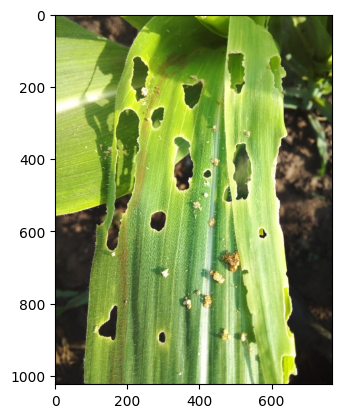

In [38]:
# Code to display the image  in the testing set
img = mgimg.imread("/content/test_set/id_046yl0cxn3ybz.jpg")
plt.imshow(img)
plt.show()

###
The model predicted that probability that the crop will be affected by a fall Amyworm is 0.957394 and it reality it is affected by the worm as evidenced in the image above

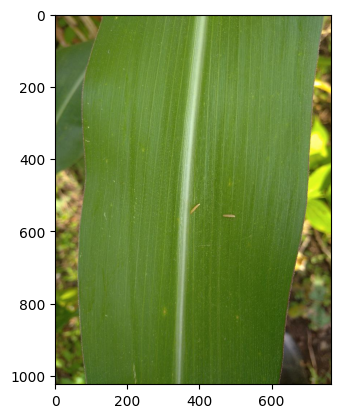

In [39]:
# Code to display the image "id_00exusbkgzw1b.jpg" in the testing set
img = mgimg.imread("/content/test_set/id_00exusbkgzw1b.jpg")
plt.imshow(img)
plt.show()

In [40]:
df = pd.DataFrame({'Image_ID':test_df['Image_id'],'Target':round(test_df['Target'],2)})

In [41]:
df.head()

,Image_ID,Target
0,id_00exusbkgzw1b.jpg,0.26
1,id_03dqinf6w0znv.jpg,0.04
2,id_046yl0cxn3ybz.jpg,0.91
3,id_04athdtx2abyg.jpg,0.28
4,id_062aauf9e9jk0.jpg,0.34


In [42]:
test_df.tail()

,Image_id,Target
1075,id_zv5fvjnakvf1r.jpg,0.914705
1076,id_zvpikh1z30arn.jpg,0.064111
1077,id_zypilwkudljyz.jpg,0.366671
1078,id_zz9lwehh5sxdp.jpg,0.331056
1079,id_zzq9gaptlwd4w.jpg,0.922441


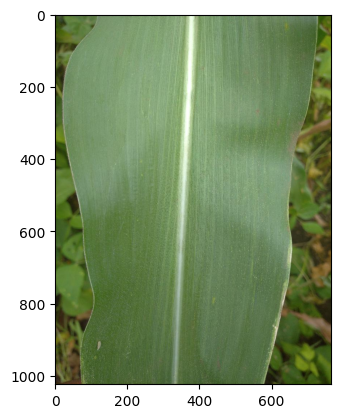

In [43]:
# Code to display the image "id_zvpikh1z30arn.jpg" in the testing set
img = mgimg.imread("/content/test_set/id_zvpikh1z30arn.jpg")
plt.imshow(img)
plt.show()

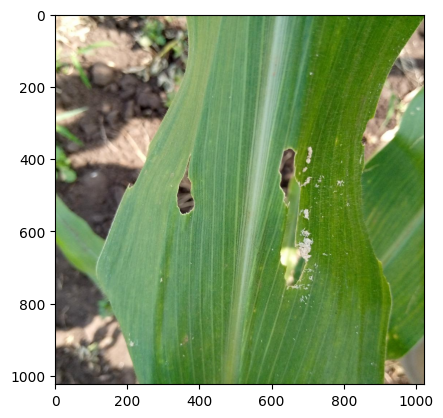

In [44]:
# Code to display the image "id_zzq9gaptlwd4w.jpg" in the testing set
img = mgimg.imread("/content/test_set/id_zzq9gaptlwd4w.jpg")
plt.imshow(img)
plt.show()

In [45]:
import numpy as np

In [46]:
df2 = np.where(df['Target'] >= 0.5, 1, 0)

In [47]:
df2 = pd.DataFrame(df2,columns=['Target'])

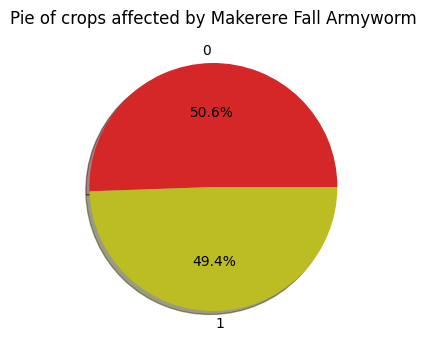

In [48]:
# Create a pie chart to show the percentage for the target column
plt.figure(figsize=(4,5))
values = df2["Target"].value_counts() /df2.shape[0]
plt.pie(values,labels=values.keys(),autopct="%1.1f%%",shadow=True,colors=['C3','C8'])
plt.title("Pie of crops affected by Makerere Fall Armyworm")
plt.show()

In [49]:
# code to save the predicted values as a csv file
df.to_csv("Worm_predict.csv",index=False)   #

# Model deployment

In [50]:
## Create a pickle file
import pickle
pickle_out = open('history.pkl','wb')
pickle.dump(history,pickle_out)
pickle_out.close()

In [51]:
from google.colab import files

In [52]:
files.download('Worm_predict.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>